In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df['Genre'] .head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9832    False
9833    False
9834    False
9835    False
9836    False
Length: 9837, dtype: bool

In [8]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [ ]:
Exploration summary
we have a datafram consisting of 9827 rows and 9 columns.
our dataset looks a bit tidy with no NaNs nor dupplicated values.
Release_Date column need to be casted into data time and to extract only the year value.
overview, origibal_Lnaguage and Poster-url would not be so useful during analysis, so well drop them.
there is noticable outliers in popular column
vote_Average better be categorised for proper analysis.
Genre colum has comma saperated values and white spaces that needs to be handled and casted into category.Exploration summary

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [20]:
import pandas as pd
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [28]:
df['Release_Date'].head(10)


0    15-12-2021
1    01-03-2022
2    25-02-2022
3    24-11-2021
4    22-12-2021
5    07-01-2022
6    12-01-2022
7    10-02-2022
8    17-02-2022
9    03-11-2021
Name: Release_Date, dtype: object

In [31]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)


In [32]:
df['Release_Date'].isna().sum()


10

In [34]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [3]:
import pandas as pd
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [4]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y', errors='coerce')
print(df['Release_Date'].dtypes)


datetime64[ns]


In [5]:
df['Release_Year'] = df['Release_Date'].dt.year
print(df[['Release_Date', 'Release_Year']].head())


  Release_Date  Release_Year
0   2021-12-15        2021.0
1   2022-03-01        2022.0
2   2022-02-25        2022.0
3   2021-11-24        2021.0
4   2021-12-22        2021.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   object        
 5   Vote_Average       9827 non-null   object        
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
        9837 non-null   object        
 9   Release_Year       9827 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 768.6+ KB


In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022.0
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021.0
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021.0


In [12]:
df =pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [15]:
df.columns = df.columns.str.strip()


In [16]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True, errors='ignore')
print(df.columns)


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [17]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

# Clean up any trailing spaces or carriage returns in column names
df.columns = df.columns.str.strip()

cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True, errors='ignore')

print(df.columns)


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [21]:
In [20]: def categorize_col(df, col, labels):
#  This line and all lines below it must be indented (e.g., 4 spaces)
    # categorizes a certain column based on its quartiles
    # Args:
    # df - dataframe we are processing
    # col str - to be categorized column's name
    # labels list - list of labels from min to max
    # Returns:
    # df(df) - dataframe with the categorized col

    # Setting the edges to cut the column accordingly
    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [27]:
df['Vote_Average'].value_counts()

Vote_Average
6.4          435
6.3          429
6.5          427
6.8          423
6.7          420
            ... 
9.2            1
1.5            1
3.1            1
Animation      1
10             1
Name: count, Length: 75, dtype: int64

In [29]:
df.dropna(inplace = True)

In [30]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [32]:
df['Genre'] = df['Genre'].str.split(', ')

In [33]:
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery


In [34]:
df['Genre'] = df['Genre'].astype('category')

In [35]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  object  
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  object  
 5   Genre         25792 non-null  category
dtypes: category(1), float64(1), object(4)
memory usage: 1.0+ MB


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  object  
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  object  
 5   Genre         25792 non-null  category
dtypes: category(1), float64(1), object(4)
memory usage: 1.0+ MB


In [38]:
df.nunique()

Release_Date    5892
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

In [40]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

In [44]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()
we

NameError: name 'sns' is not defined

In [45]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as plt

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


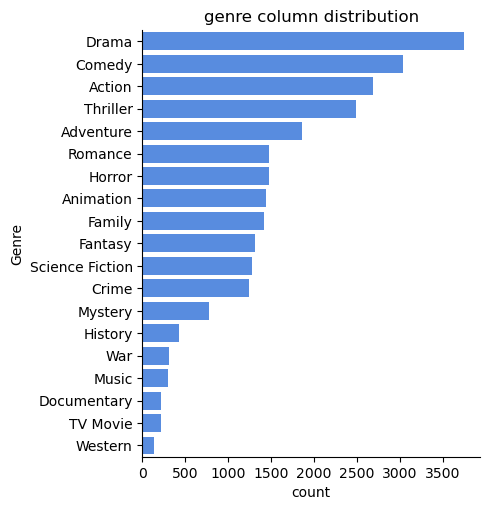

NameError: name 'we' is not defined

In [47]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()
we

In [48]:
import matplotlib.pyplot as plt

In [49]:
# Place this in an early cell in your notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # This fixes the 'plt' NameError
import seaborn as sns            # This fixes the 'sns' NameError

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


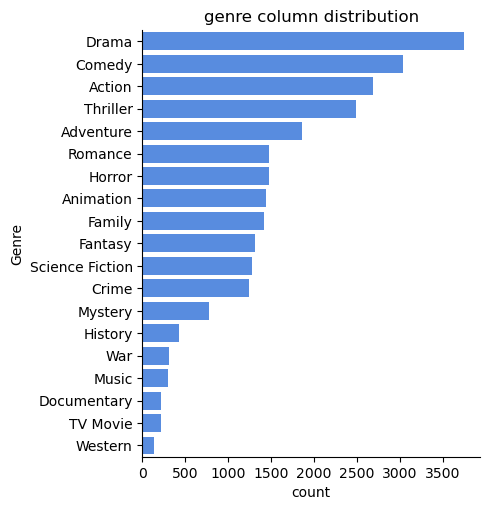

In [50]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


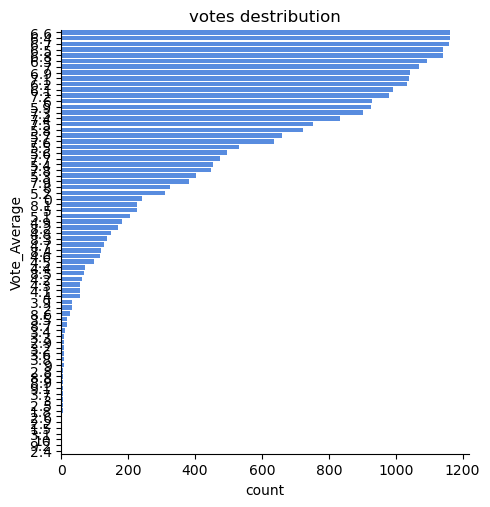

In [51]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
order = df['Vote_Average'].value_counts().index,
color = '#4287f5')
plt.title('votes destribution')
plt.show()

In [52]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


In [53]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25787,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25788,31-03-2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25789,23-09-1984,Threads,13.354,186,7.8,War
25790,23-09-1984,Threads,13.354,186,7.8,Drama
25791,23-09-1984,Threads,13.354,186,7.8,Science Fiction


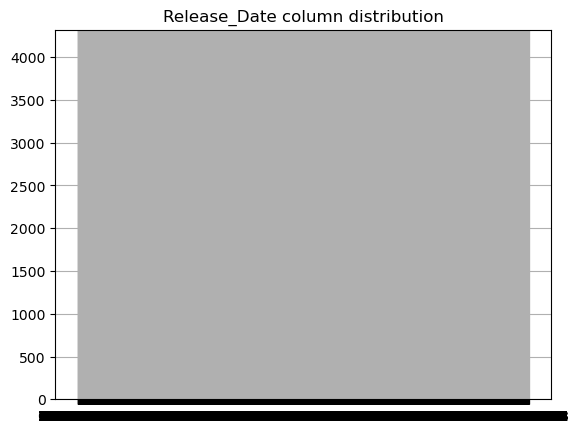

In [54]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

In [55]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
